In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt

import os
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import make_grid
from PIL import Image

import urllib.request as request

In [2]:
class Net(nn.Module):
  def __init__(self, n_ch):
    super(Net, self).__init__()

    self.n_ch = n_ch
    self.conv1 = nn.Conv2d(3, self.n_ch, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(self.n_ch, self.n_ch*2, kernel_size=3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(self.n_ch*2, self.n_ch*4, kernel_size=3, stride=1, padding=1)
    self.fc1 = nn.Linear(self.n_ch*4*8*8, self.n_ch*4)
    self.fc2 = nn.Linear(self.n_ch*4, 6)

  def forward(self, x):
    # img = 3ch x 64 px x 64 px
    x = self.conv1(x) # n_channels x 64 x 64
    x = F.relu(F.max_pool2d(x,2)) # divide img by 2 -> n_channels x 32 x 32
    x = self.conv2(x) # n_channels x 32 x 32
    x = F.relu(F.max_pool2d(x,2)) # divide img by 2 -> n_channels*2 x 16 x 16 
    x = self.conv3(x) # n_channels x 16 x 16
    x = F.relu(F.max_pool2d(x,2)) # divide img by 2 -> n_channels*4 x 8 x 8

    # flatten
    x = x.view(-1, self.n_ch*4*8*8)

    # fc
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)

    # Log_softmax
    x = F.log_softmax(x, dim = 1)

    return x

In [3]:
model = Net(32)

In [4]:
def imshow(inp, title=None):
  inp = inp.numpy().transpose((1,2,0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  inp = std*inp + mean
  inp = np.clip(inp, 0, 1)

  plt.imshow(inp)
  
  if title is not None:
    plt.title(title)
  
  plt.pause(0.001)

In [5]:
data_path = './datasets/'

full_data_set = datasets.CIFAR10(data_path, train = True, download=True,
                                 transform = transforms.Compose([
                                                                 transforms.Resize(64),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                                                      (0.2470, 0.2435, 0.2616))
                                 ]))

full_validation_set = datasets.CIFAR10(data_path, train = False, download=True,
                                 transform = transforms.Compose([
                                                                 transforms.Resize(64),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                                                      (0.2470, 0.2435, 0.2616))
                                 ]))

Files already downloaded and verified
Files already downloaded and verified


In [6]:
size = 32
dataloader = DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


horse
car
ship
horse
cat
dog
frog
frog
dog
dog
cat
ship
car
bird
ship
horse
plane
horse
frog
frog
plane
cat
cat
horse
horse
ship
dog
car
car
cat
frog
bird


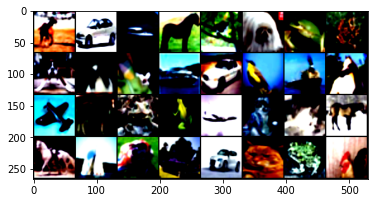

In [7]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.imshow(make_grid(imgs).permute(1,2,0))

for i in range(size):
  print(classes[labels[i]])

In [8]:
class_names = ['cat', 'dog']

label_map = {3: 0, 5:1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [3,5]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [3,5]]

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

train_loader = DataLoader(data_set, batch_size=64, shuffle=True)

model = Net(32).to(device)

optimizer = optim.SGD(model.parameters(), lr = 0.02)
loss_function = nn.NLLLoss()

n_epoch = 100

for epoch in range(n_epoch):
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)

    outputs = model(inputs)
    loss = loss_function(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'epoch: {epoch} / {n_epoch}, loss: {float(loss): 4f}')

cpu
epoch: 0 / 100, loss:  0.760411
epoch: 1 / 100, loss:  0.736328
epoch: 2 / 100, loss:  0.516037
epoch: 3 / 100, loss:  0.873779
epoch: 4 / 100, loss:  0.571041
epoch: 5 / 100, loss:  0.613899
epoch: 6 / 100, loss:  0.563883
epoch: 7 / 100, loss:  0.484606
epoch: 8 / 100, loss:  0.510845
epoch: 9 / 100, loss:  0.630109
epoch: 10 / 100, loss:  0.731985
epoch: 11 / 100, loss:  0.697042
epoch: 12 / 100, loss:  0.625927
epoch: 13 / 100, loss:  0.441007
epoch: 14 / 100, loss:  0.546791
epoch: 15 / 100, loss:  0.468552
epoch: 16 / 100, loss:  0.448342
epoch: 17 / 100, loss:  0.462990
epoch: 18 / 100, loss:  0.384963
epoch: 19 / 100, loss:  0.326165
epoch: 20 / 100, loss:  0.430752
epoch: 21 / 100, loss:  0.603334
epoch: 22 / 100, loss:  0.525647
epoch: 23 / 100, loss:  0.311217
epoch: 24 / 100, loss:  0.373323
epoch: 25 / 100, loss:  0.361133
epoch: 26 / 100, loss:  0.379685
epoch: 27 / 100, loss:  0.439328
epoch: 28 / 100, loss:  0.177067
epoch: 29 / 100, loss:  0.485664
epoch: 30 / 100,

In [10]:
val_loader = DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for inputs, targets in val_loader:

    inputs, targets = inputs.to(device), targets.to(device)

    outputs = model(inputs)
    _, predicted = torch.max(outputs, dim=1)
    total += targets.shape[0]

    correct += int((predicted==targets).sum())
  
print(f'Accuracy: {(correct/total): .4f}')

Accuracy:  0.7375


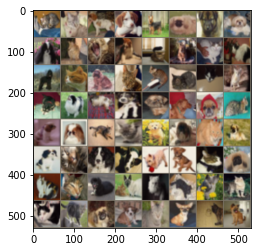

tensor([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1])
tensor([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1])


In [11]:
inputs_out = []
outputs = []

for inputs, targets in val_loader:
  inputs_out = inputs
  out = make_grid(inputs)
  imshow(out)
  print(targets)
  inputs, targets = inputs.to(device), targets.to(device)
  outputs = model(inputs)
  _, pred = torch.max(outputs, 1)
  print(pred)
  break

correct:  dog model:  dog


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


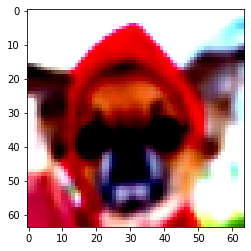

In [12]:
img, label = validation_set[30]
model.to('cpu')
out = model(torch.unsqueeze(img, 0))
_, index = torch.max(out, dim = 1)

print('correct: ', class_names[label], 'model: ', class_names[index])
plt.imshow(img.permute(1,2,0))